# Optimizing KNN

##Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

##Load Data

In [ ]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## About the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data-Preprocessing

###Rename Columns

In [ ]:
df=df.rename(columns={'sepal_length':'X1', 'sepal_width':'X2', 'petal_length':'X3', 'petal_width':'X4',
       'species':'L'})

### Encode Labels

In [ ]:
#Lets first import the preprocessing module
from sklearn.preprocessing import LabelEncoder
#Now let's form a label Encoder model
le = LabelEncoder()
#Now we use feed the label column to the model
le.fit(df['L'])
#Model will go through column and find the unique labels (Number of classes that are there)
#Following line will print the labels found in the column
list(le.classes_)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
le.transform(df['L'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Lets replace these numbers with the labels in data
df['L']=le.transform(df['L'])
#Check data again
df.head()

,X1,X2,X3,X4,L
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

In [ ]:
features = ['X1','X2','X3','X4']

### Visualization

Visualize data by plotting relations between different features.

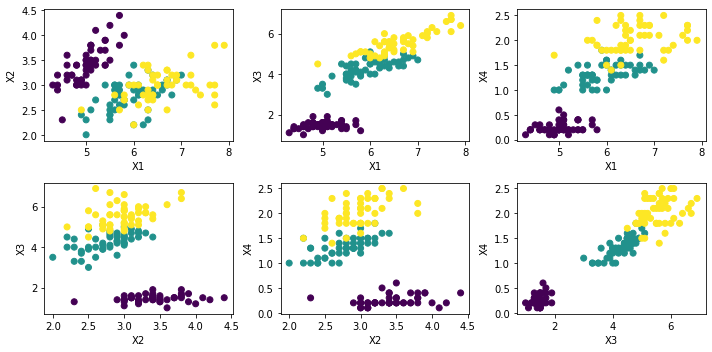

In [ ]:
#Display classes for unique pair of features
plt.figure(figsize = (10,5))
plt.subplot(2,3,1)
plt.scatter(df['X1'], df['X2'],c=df['L'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(2,3,2)
plt.scatter(df['X1'], df['X3'],c=df['L'])
plt.xlabel('X1')
plt.ylabel('X3')
plt.subplot(2,3,3)
plt.scatter(df['X1'], df['X4'],c=df['L'])
plt.xlabel('X1')
plt.ylabel('X4')
plt.subplot(2,3,4)
plt.scatter(df['X2'], df['X3'],c=df['L'])
plt.xlabel('X2')
plt.ylabel('X3')
plt.subplot(2,3,5)
plt.scatter(df['X2'], df['X4'],c=df['L'])
plt.xlabel('X2')
plt.ylabel('X4')
plt.subplot(2,3,6)
plt.scatter(df['X3'], df['X4'],c=df['L'])
plt.xlabel('X3')
plt.ylabel('X4')
plt.tight_layout()

##Normalize Data

In [ ]:
#Normalize data and check few rows
scaler = StandardScaler()
scaler.fit(df.drop(columns='L'))
df_scaled = scaler.transform(df.drop(columns='L'))
print(f'Few rows below:\n {df_scaled[:10]} \n Shape: {df_scaled.shape}')

Few rows below:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]] 
 Shape: (150, 4)


##Splitting Data

In [ ]:
# 30% Training data
X_training, X_testing, Y_training, Y_testing = train_test_split(df_scaled, df['L'], test_size=0.3)

##K Nearest Neighbor

In [ ]:
#Function to create and fit KNN model
def KNN(k):
  #Define Lists to store results
  f1 = []
  accuracy = []
  recall = []
  precision = []
  for i in range(1, k+1):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    #Get best weights
    knn.fit(X_training,Y_training)
    #Predict classes for Testing dataset
    Y_testing_predicted = knn.predict(X_testing)
    # Calclate model evaluation parameters
    accuracy.append(accuracy_score(Y_testing,Y_testing_predicted))
    f1.append(f1_score(Y_testing,Y_testing_predicted,average='weighted'))
    precision.append(precision_score(Y_testing,Y_testing_predicted,average='weighted'))
    recall.append(recall_score(Y_testing,Y_testing_predicted,average='weighted'))
  return (f1,accuracy,recall,precision)

##Display Performance in a graph

In [ ]:
#Function to display performance graph
def display_performance(k,f1,accuracy,recall,precision):
  neighbours = [n+1 for n in range(k)]
  #Plot Evaluation metrics 
  fig,axes = plt.subplots(figsize=(10,5),num='Model Evaluation')
  #Define labels to display
  axes.set_title('Performance')
  axes.set_xlabel("Neighbours")
  axes.set_ylabel("Score")
  axes.set_ylim([0.8,1.1])
  axes.set_xlabel("Neighbours")
  axes.set_xticks(neighbours)
  #Plot F1,Accuracy, Precision & Recall
  axes.plot(neighbours,accuracy,label = 'Accuracy')
  axes.plot(neighbours,precision,label = 'Precision')
  axes.plot(neighbours,recall,label = 'Recall')
  axes.plot(neighbours,f1,label = 'F1 Score')
  axes.legend()
  fig.show()

##Call KNN for values between 1 to 30

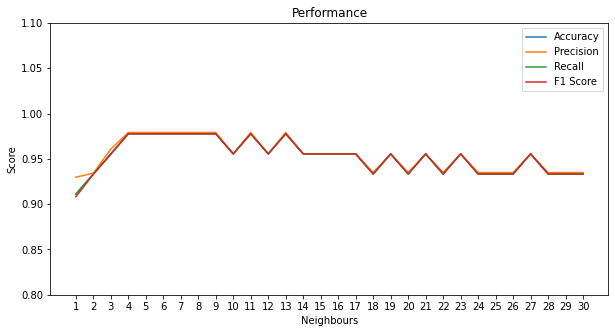

In [ ]:
#Call KNN 30 times
k = 30
f1,accuracy,recall,precision = KNN(k)
display_performance(k,f1,accuracy,recall,precision)

##Conclusion

From the above graph, we see that the values of the evaluation parameters vary with neighbours (k). All parameters vary together.

However, there is a point when all the parameters namely: **f1 score, precision, accuracy and recall** are at their peaks. This is when 'k' is **24**. Thus, I will pick the value of 'k' as **24**.

Another interesting observation is that the best value of 'k' or best continous range of values of 'k' vary significantly with the training set being used.